<a href="https://colab.research.google.com/github/Samin-Sadaf7/Image_works/blob/main/DIP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd

In [6]:
import cv2
from google.colab.patches import cv2_imshow

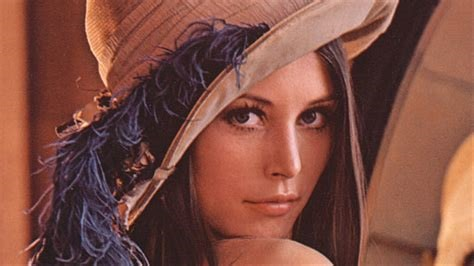

In [24]:
a = cv2.imread('/content/gdrive/MyDrive/lena.jpg')
cv2_imshow(a)

[255 255 255 ... 255 255 255]


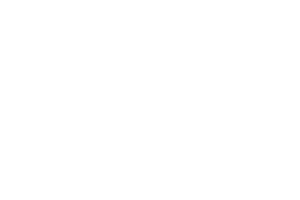

In [20]:
flatnpArray =np.full((60000,),255,dtype=np.uint8)
print(flatnpArray)
binimg = flatnpArray.reshape(200,300)
cv2_imshow(binimg)

[0 0 0 ... 0 0 0]


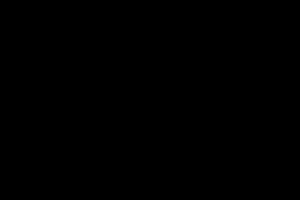

In [21]:
flatnpArray =np.full((60000,),0,dtype=np.uint8)
print(flatnpArray)
binimg = flatnpArray.reshape(200,300)
cv2_imshow(binimg)

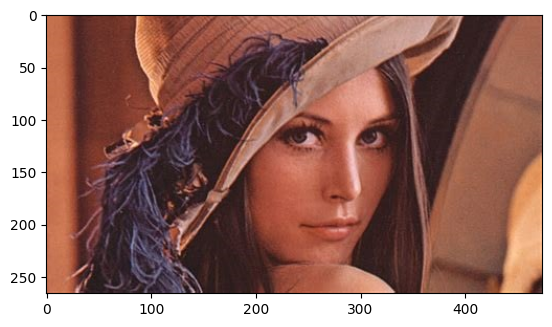

In [26]:
lena_rgb = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.imshow(lena_rgb)

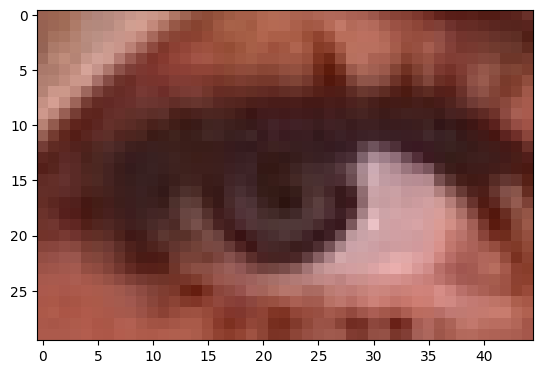

In [34]:
left_eye=lena_rgb[100:130, 220:265]
plt.imshow(left_eye)